In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2
from collections import Counter

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.svm import SVC

from qksvm.QuantumFeatureMap import QuantumFeatureMap
from qksvm.QKSVC import QKSVC

# Customized score functions
from qksvm.scores import get_scores, print_scores, print_cv_scores
from qksvm.scores import cross_validate_split, grid_search_cv

# Custom visualization tools
from qksvm.visualization_tools import plot_dataset, plot_predictions, plot_decisions

seed = 12345

In [2]:
def cv_scores(score):
    print('Accuracy: {:.2f} +- {:.2f}'.format(
        np.mean(score['test_balanced_accuracy']), 
        np.std(score['test_balanced_accuracy']), )
    )
    print('      F1: {:.2f} +- {:.2f}'.format(
        np.mean(score['test_f1_macro']), 
        np.std(score['test_f1_macro']), )
    )
    print('     MCC: {:.2f} +- {:.2f}'.format(
        np.mean(score['test_matthews_corrcoef']), 
        np.std(score['test_matthews_corrcoef']), )
    )

# Blobs dataset

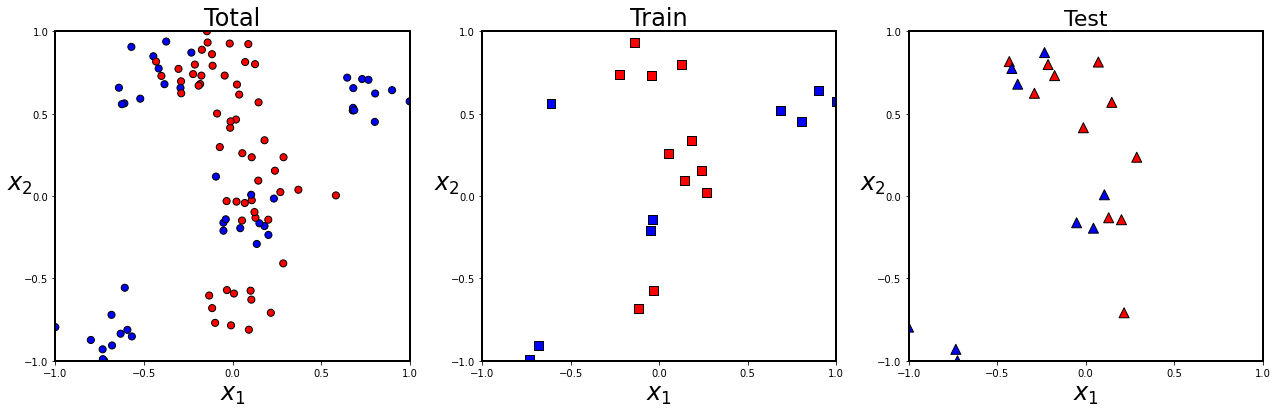

In [3]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

n_samples = 100
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=9, random_state=120, shuffle=True, cluster_std=1.2)
y[y%2 == 0] = -1
y[y > 0] = 1

xmin = -1; xmax = 1
X = MinMaxScaler(feature_range=(xmin, xmax)).fit_transform(X)
axes = [xmin, xmax, xmin, xmax]

train_size = 20
test_size = 20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=train_size, test_size=test_size,
    stratify=y, random_state=seed
)

# Visualize the dataset
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
axes = [xmin, xmax, xmin, xmax]

ax1.set_title("Total", fontsize=24)
plot_dataset(X, y, ax1, axes)

ax2.set_title("Train", fontsize=24)
plot_dataset(X_train, y_train, ax2, axes, marker='s', size=80)

ax3.set_title("Test", fontsize=22)
plot_dataset(X_test, y_test, ax3, axes, marker='^', size=100)

plt.rcParams['font.size'] = 15
plt.tight_layout()
plt.show()

# RBF

Best grid search parameters: {'C': 4, 'gamma': 10.0}
Best training score: 0.8861111111111111

Train scores:
   Balanced accuracy:  0.91
                  F1:  0.91
             ROC_AUC:  0.96
                 MCC:  0.82
              precision    recall  f1-score   support

          -1       0.91      0.93      0.92        45
           1       0.91      0.89      0.90        35

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80

[[42  3]
 [ 4 31]]

Test scores:
   Balanced accuracy:  0.76
                  F1:  0.75
             ROC_AUC:  0.86
                 MCC:  0.53
              precision    recall  f1-score   support

          -1       0.88      0.64      0.74        11
           1       0.67      0.89      0.76         9

    accuracy                           0.75        20
   macro avg       0.77      0.76      0.75        20
weighted avg       0.78      0.75   

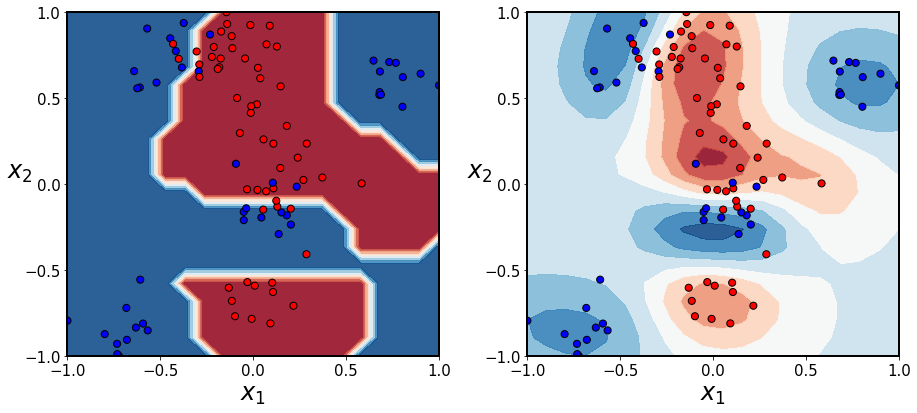

In [4]:
param_grid = {
    "gamma": [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 5.0, 10.0],
    "C": [1, 2, 4, 6, 8, 10, 100],
}
clf = SVC(kernel='rbf', random_state=seed)

clf = grid_search_cv(clf, param_grid, X, y, train_size=0.8, test_size=0.2, seed=seed)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
plot_predictions(clf, ax1, axes, N=20)
plot_dataset(X, y, ax1, axes)
plot_decisions(clf, ax2, axes, N=20)
plot_dataset(X, y, ax2, axes)
plt.tight_layout()
plt.show()

In [5]:
clf = SVC(kernel='rbf', C=4.0, gamma=10, random_state=seed)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

cross_validate_split(clf, X, y, train_size=0.8, test_size=0.2, seed=seed)


==== CV.SPLIT Cross-Validation Scores ====

Train set:
   Balanced accuracy:  0.91 +- 0.02
                  F1:  0.91 +- 0.02
             ROC_AUC:  0.96 +- 0.01
                 MCC:  0.82 +- 0.04

Test set:
   Balanced accuracy:  0.84 +- 0.08
                  F1:  0.84 +- 0.08
             ROC_AUC:  0.89 +- 0.08
                 MCC:  0.69 +- 0.15


# QSVC

Best grid search parameters: {'C': 1, 'alpha': 3.1999999999999993, 'feature_map': ['h', 'rz', 'cz'], 'n_layers': 3, 'n_qubits': 4}
Best training score: 0.8861111111111111

Train scores:
   Balanced accuracy:  0.90
                  F1:  0.91
             ROC_AUC:  0.97
                 MCC:  0.83
              precision    recall  f1-score   support

          -1       0.88      0.98      0.93        45
           1       0.97      0.83      0.89        35

    accuracy                           0.91        80
   macro avg       0.92      0.90      0.91        80
weighted avg       0.92      0.91      0.91        80

[[44  1]
 [ 6 29]]

Test scores:
   Balanced accuracy:  0.75
                  F1:  0.75
             ROC_AUC:  0.85
                 MCC:  0.50
              precision    recall  f1-score   support

          -1       0.80      0.73      0.76        11
           1       0.70      0.78      0.74         9

    accuracy                           0.75        20
   macro avg

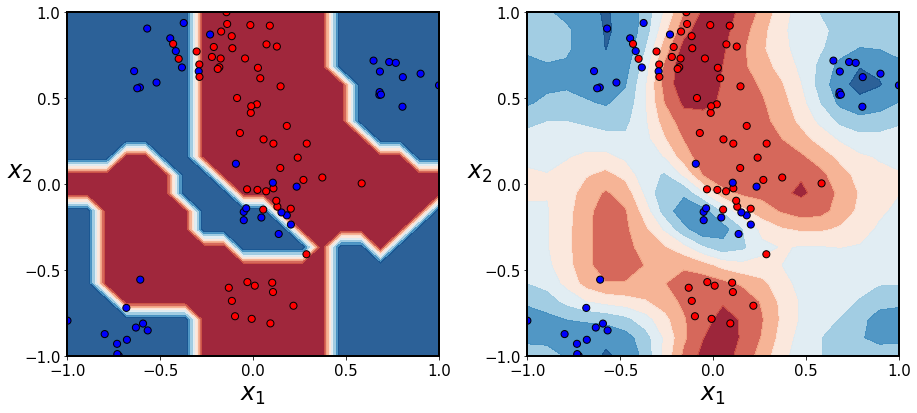

In [7]:
param_grid = {
    "alpha": np.arange(0.8, 3.2, 0.2),
    "C": [1],
    "n_layers": [1, 2, 3, 4],
    "n_qubits": [2, 3, 4],
    "feature_map": [
                    ['h', 'rz', 'cz'],
                   ],
}

qsvc = QKSVC(random_state=seed)
qsvc = grid_search_cv(qsvc, param_grid, X, y, train_size=0.8, test_size=0.2, seed=seed)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
plot_predictions(qsvc, ax1, axes, N=20)
plot_dataset(X, y, ax1, axes)
plot_decisions(qsvc, ax2, axes, N=20)
plot_dataset(X, y, ax2, axes)
plt.tight_layout()
plt.show()

In [8]:
alpha = 3.2
fm = QuantumFeatureMap(
    num_features=len(X[0]), 
    num_qubits=4,
    num_layers=3,
    gates=['H', 'RZ', 'CZ'], entanglement='linear',
)
print(fm.draw(plot_barriers=False, fold=120))

qsvc = QKSVC(feature_map=fm, alpha=alpha, C=1.0, random_state=seed)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
score = cross_validate(
    qsvc, X, y, scoring=["balanced_accuracy", "f1_macro", "matthews_corrcoef"], n_jobs=1, verbose=0, cv=cv,
)
cv_scores(score)

     ┌───┐ ┌────────────┐           ┌───┐ ┌────────────┐           ┌───┐ ┌────────────┐           
q_0: ┤ H ├─┤ Rz(x[0]*α) ├──■────────┤ H ├─┤ Rz(x[0]*α) ├──■────────┤ H ├─┤ Rz(x[0]*α) ├──■────────
     ├───┤ ├────────────┤  │        ├───┤ ├────────────┤  │        ├───┤ ├────────────┤  │        
q_1: ┤ H ├─┤ Rz(x[1]*α) ├──■──■─────┤ H ├─┤ Rz(x[1]*α) ├──■──■─────┤ H ├─┤ Rz(x[1]*α) ├──■──■─────
     ├───┤ ├────────────┤     │     ├───┤ ├────────────┤     │     ├───┤ ├────────────┤     │     
q_2: ┤ H ├─┤ Rz(x[0]*α) ├─────■──■──┤ H ├─┤ Rz(x[0]*α) ├─────■──■──┤ H ├─┤ Rz(x[0]*α) ├─────■──■──
     ├───┤ ├────────────┤        │  ├───┤ ├────────────┤        │  ├───┤ ├────────────┤        │  
q_3: ┤ H ├─┤ Rz(x[1]*α) ├────────■──┤ H ├─┤ Rz(x[1]*α) ├────────■──┤ H ├─┤ Rz(x[1]*α) ├────────■──
     └───┘ └────────────┘           └───┘ └────────────┘           └───┘ └────────────┘           
Accuracy: 0.83 +- 0.11
      F1: 0.83 +- 0.11
     MCC: 0.71 +- 0.18


In [9]:
alpha = 3.2
fm = QuantumFeatureMap(
    num_features=len(X[0]), 
    num_qubits=4,
    num_layers=3,
    gates=['H', 'RZ', 'CZ'], entanglement='linear',
)
print(fm.draw(plot_barriers=False, fold=120))

qsvc = QKSVC(feature_map=fm, alpha=alpha, C=1.0, random_state=seed)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

cross_validate_split(qsvc, X, y, train_size=0.8, test_size=0.2, seed=seed)

     ┌───┐ ┌────────────┐           ┌───┐ ┌────────────┐           ┌───┐ ┌────────────┐           
q_0: ┤ H ├─┤ Rz(x[0]*α) ├──■────────┤ H ├─┤ Rz(x[0]*α) ├──■────────┤ H ├─┤ Rz(x[0]*α) ├──■────────
     ├───┤ ├────────────┤  │        ├───┤ ├────────────┤  │        ├───┤ ├────────────┤  │        
q_1: ┤ H ├─┤ Rz(x[1]*α) ├──■──■─────┤ H ├─┤ Rz(x[1]*α) ├──■──■─────┤ H ├─┤ Rz(x[1]*α) ├──■──■─────
     ├───┤ ├────────────┤     │     ├───┤ ├────────────┤     │     ├───┤ ├────────────┤     │     
q_2: ┤ H ├─┤ Rz(x[0]*α) ├─────■──■──┤ H ├─┤ Rz(x[0]*α) ├─────■──■──┤ H ├─┤ Rz(x[0]*α) ├─────■──■──
     ├───┤ ├────────────┤        │  ├───┤ ├────────────┤        │  ├───┤ ├────────────┤        │  
q_3: ┤ H ├─┤ Rz(x[1]*α) ├────────■──┤ H ├─┤ Rz(x[1]*α) ├────────■──┤ H ├─┤ Rz(x[1]*α) ├────────■──
     └───┘ └────────────┘           └───┘ └────────────┘           └───┘ └────────────┘           

==== CV.SPLIT Cross-Validation Scores ====

Train set:
   Balanced accuracy:  0.90 +- 0.02
                 